In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import sys 
sys.path.append("/scratch/izar/kapps/DEX-Cyclic-Arbitrage/")
from config.get import cfg
import numpy as np
import pandas as pd
import seaborn as sns

In [39]:
X_train = np.load(cfg["files"]["encoded_train_features"])
print(X_train.shape)

(7000, 100)


In [49]:
X_train_raw = np.load(cfg["files"]["raw_train_features"])
X_train_raw[0].mean()
c = 0
for x in X_train_raw:
    if not x.mean()>0.1:
        c+=1
c

6303

In [48]:
len(X_train_raw)

7000

In [31]:
k_max = 6

silhouettes = []
sse = []
for k in range(2, k_max): # Try multiple k
    print(k,end="\r")
    # Cluster the data and assign the labels
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_train)
    # Get the Silhouette score
    score = silhouette_score(X_train, labels)
    silhouettes.append({"k": k, "score": score})
    
    sse.append({"k": k, "sse": kmeans.inertia_})
    
# Convert to dataframes
silhouettes = pd.DataFrame(silhouettes)
sse = pd.DataFrame(sse)

/scratch/izar/kapps/DEX-Cyclic-Arbitrage/opt/venv-gcc/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/scratch/izar/kapps/DEX-Cyclic-Arbitrage/opt/venv-gcc/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


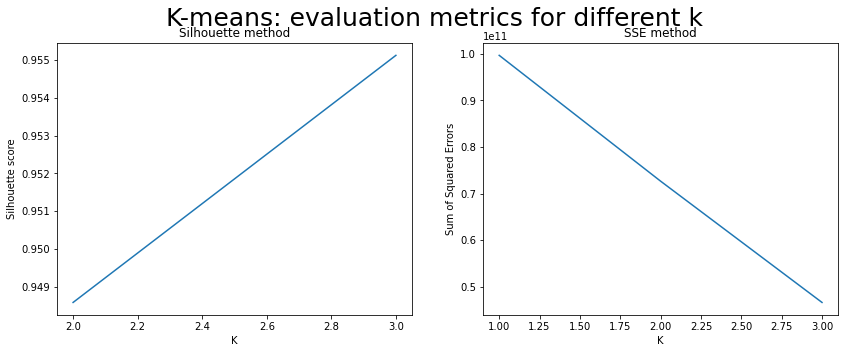

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(14,5))
# Plot silhouettes
plt.subplot(121)
sns.lineplot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.title("Silhouette method")
# Plot sse
plt.subplot(122)
sns.lineplot(sse.k, sse.sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors")
plt.title("SSE method")
fig.suptitle("K-means: evaluation metrics for different k",fontsize=25)
plt.show()